This Notebook Preprocesses the environmental data and make analysis with it. As well as comparison with mobility data.

In [1]:
# Import libraries
import folium
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator

from functools import reduce 

In [2]:
!pip install matplotlib==3.5

In [3]:
root_dir = '/content/drive/MyDrive/Environmental_covid 19/' # Location where my file directory are located

In [5]:
# read the airquality data
no2_df = pd.read_csv(os.path.join(root_dir, 'Sentinel-5P Air Polluant/L3_NO2_Lagos_JanAug20192021'))
so2_df = pd.read_csv(os.path.join(root_dir, 'Sentinel-5P Air Polluant/L3_SO2_Lagos_JanAug20192021'))
aer_df = pd.read_csv(os.path.join(root_dir, 'Sentinel-5P Air Polluant/L3_AER_AI_Lagos_JanAug20192021'))
co_df = pd.read_csv(os.path.join(root_dir, 'Sentinel-5P Air Polluant/L3_CO_Lagos_JanAug20192021'))

# get nightlight data of Lagos
monthly_night_line_df = pd.read_csv(os.path.join(root_dir, 'monthly_nightlight_Lagos_JanAug20192021'))


# get mobility data of Lagos
lagos_mobility_df = pd.read_csv(os.path.join(root_dir, 'Nigeria Google Mobility Data/Lagos_DailyMobilityJanAug2020_2021'))

# Preprocess Data

In [6]:
# Specify date range in an idea time from 2019 - 2021
date_range_2019 = pd.date_range(start='1/1/2019', end='31/8/2019')
date_range_2020 = pd.date_range(start='1/1/2020', end='31/8/2020')
date_range_2021 = pd.date_range(start='1/1/2021', end='31/8/2021')

real_range_df = pd.DataFrame(index= date_range_2019.union(date_range_2020).union(date_range_2021))

AQ_dfs = [real_range_df,no2_df, so2_df, aer_df, co_df]

In [ ]:
def preprocess_df(df):
    # aggregate the raster value to average daily coverage
    if 'Timestamp' in df.columns:
      df['pandas_time'] = pd.to_datetime(df['Timestamp'])
      return df.groupby(pd.Grouper(key='pandas_time', freq='1D')).mean().dropna()
    else:
      return df

# merge the data_frame containing all the data together
default_column = ['millis','Timestamp',
                  'Year', 'Month', 'DOY', 'pandas_time']

AQ_df = reduce(lambda a,b: pd.merge(a,b[b.columns.difference(default_column)], 
                                    left_index=True, 
                                    right_index=True, 
                                    how='left'), 
                             [preprocess_df(df) for df in AQ_dfs])

In [ ]:
# convert the pollutant too micro value
AQ_df['tropospheric_NO2_column_number_density'] = AQ_df['tropospheric_NO2_column_number_density']* (10**6)
AQ_df['SO2_column_number_density'] = AQ_df['SO2_column_number_density']* (10**6)

# Plot Daily Air Pollutant Value

(-13.595675307488246, 108.74988820221022)


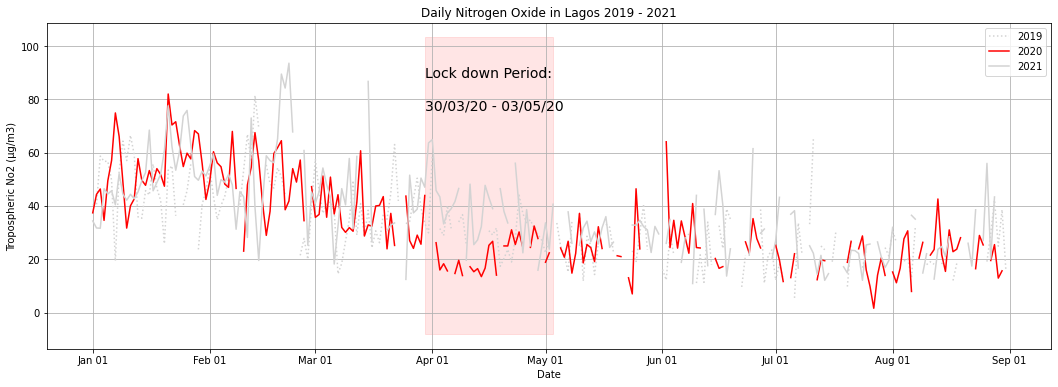

In [ ]:
# Plotting Result in a line plot.
def plot_air_quality(df, 
                     quality_type,
                     y_label,
                     x_label,
                     title = 'Daily Nitrogen Oxide in Lagos 2019 - 2021'):
    
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(df[df.index.year == 2019].index, df[df.index.year == 2019][quality_type] ,linestyle=':',color='#D3D3D3', label='2019')
    ax.plot(df[df.index.year == 2019].index, df[df.index.year == 2020][quality_type][1:] ,color='red', label='2020')
    ax.plot(df[df.index.year == 2019].index, df[df.index.year == 2021][quality_type] ,color='#D3D3D3', label='2021')


    
    # add horizontal line whene lockedown started
    ax.vlines(x = [pd.to_datetime('2019-03-30'), pd.to_datetime('2019-05-03')],
              ymin = ax.get_ylim()[0],
              ymax= ax.get_ylim()[1],
              transform=ax.get_yaxis_transform(),
              color="grey", 
              linestyle="--")
    ax.fill_between(x = [pd.to_datetime('2019-03-30'), pd.to_datetime('2019-05-03')],
                    y1= ax.get_ylim()[0],
                    y2= ax.get_ylim()[1],
                    # transform=ax.get_xaxis_transform(),
                    color="red", 
                    alpha=0.1)
    ax.text(pd.to_datetime('2019-03-30'),
            ax.get_ylim()[1]* (0.70), 
            'Lock down Period: \n\n30/03/20 - 03/05/20',
            fontsize=14)


    ax.set_title(title)
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.legend()
    ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
    plt.show()

plot_air_quality(AQ_df,
                 'tropospheric_NO2_column_number_density', 
                 y_label = 'Tropospheric No2 (µg/m3)',
                 x_label = 'Date',
                 title = 'Daily Nitrogen Oxide in Lagos 2019 - 2021')

(-999.2232720893783, 886.0831466299783)


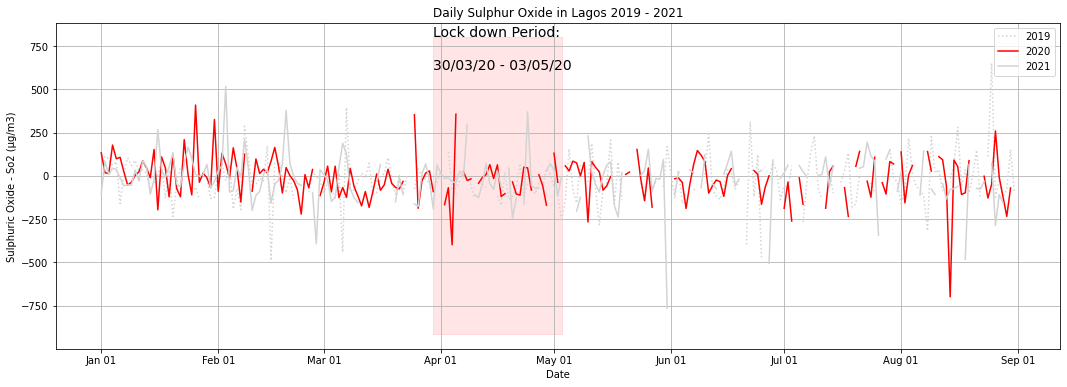

In [ ]:
plot_air_quality(AQ_df, 
                 'SO2_column_number_density',
                  y_label = 'Sulphuric Oxide - So2 (µg/m3)',
                 x_label = 'Date',
                 title = 'Daily Sulphur Oxide in Lagos 2019 - 2021')

(-3.026190178340744, 3.028884220943576)


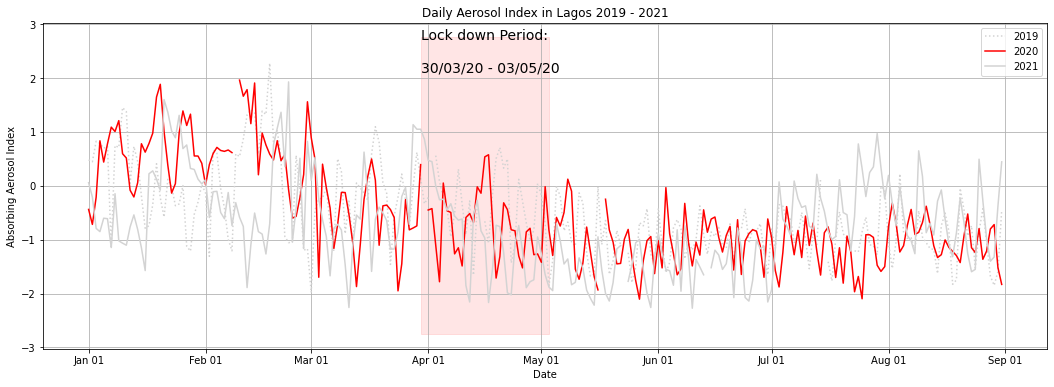

In [ ]:
plot_air_quality(AQ_df,
                 'absorbing_aerosol_index', 
                 y_label = 'Absorbing Aerosol Index',
                 x_label = 'Date',
                 title = 'Daily Aerosol Index in Lagos 2019 - 2021')

(0.021182455965672503, 0.1284479289971443)


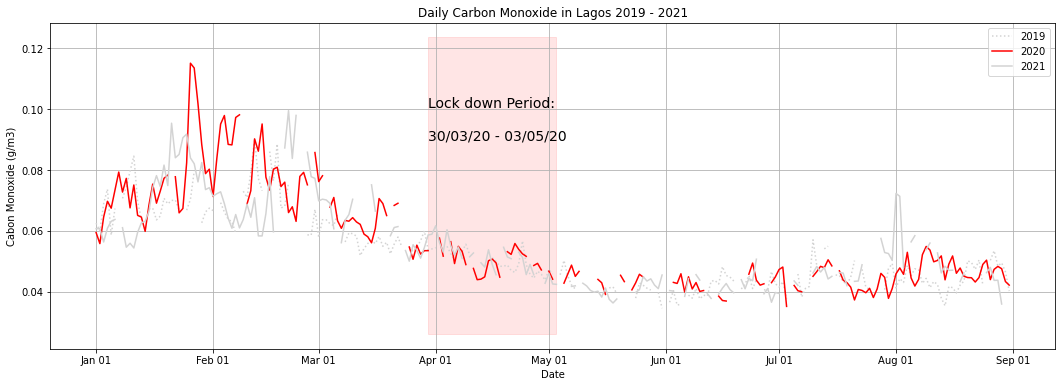

In [ ]:
plot_air_quality(AQ_df,
                 'CO_column_number_density',
                 y_label = 'Cabon Monoxide (g/m3)',
                 x_label = 'Date',
                 title = 'Daily Carbon Monoxide in Lagos 2019 - 2021')

# Plot Weekly Air Pollutant Value

(4.475771397703399, 81.66291509458925)


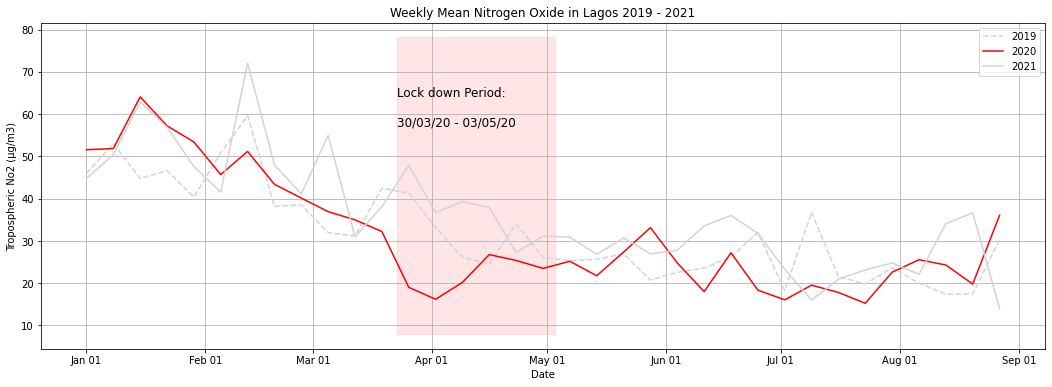

(0.028457780139363734, 0.10350890769821504)


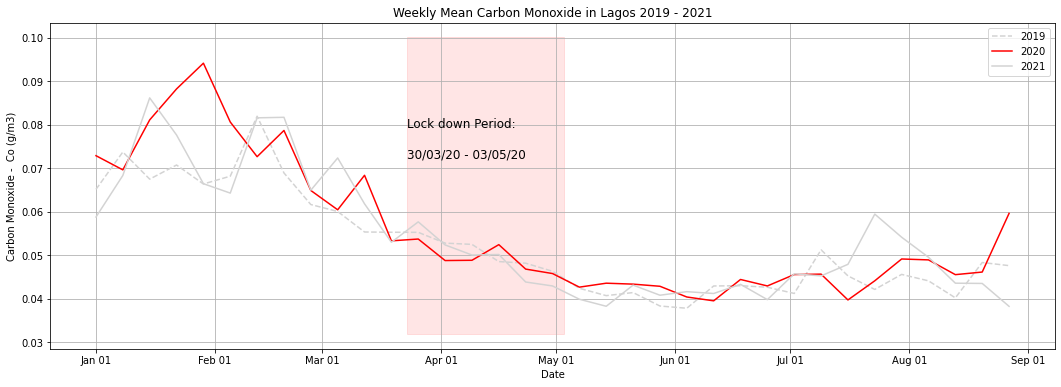

(-2.1689090937092907, 1.8840024204520187)


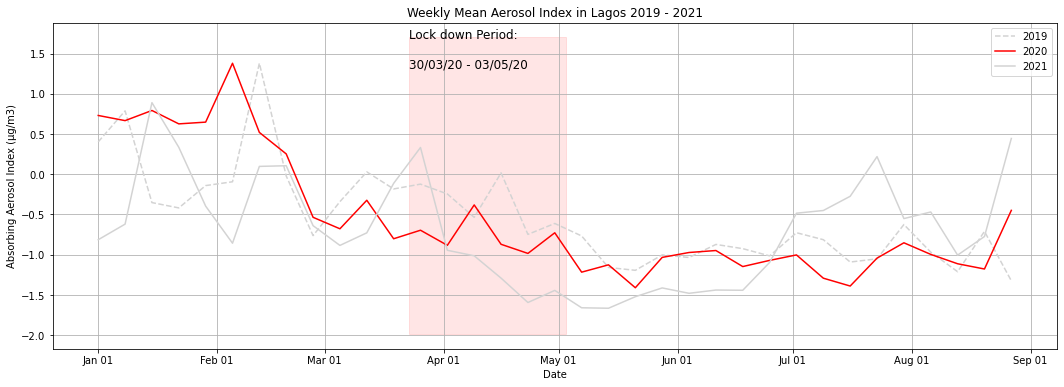

(-322.7692159914238, 172.8789158439762)


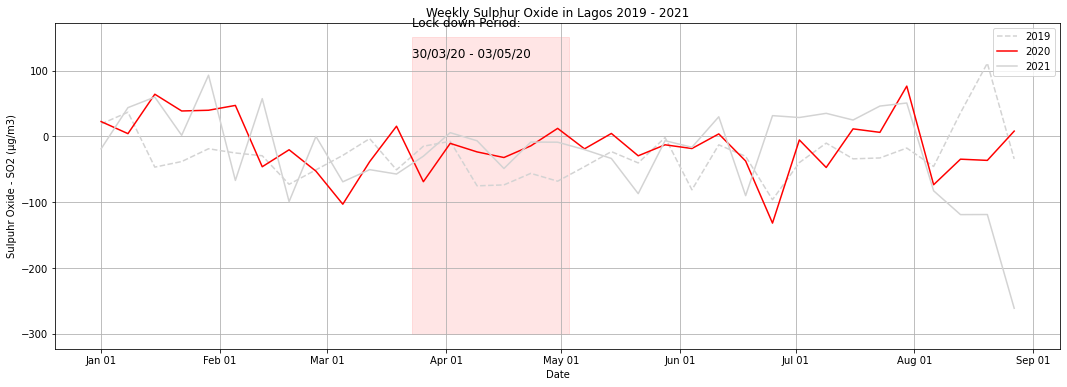

In [ ]:
# Plotting weekly pollutant in a line plot.

def weekly_plot_air_quality(df, 
                            quality_type, 
                            x_label,
                            y_label,
                            title = 'Daily Nitrogen Oxide in Lagos 2019 - 2021'):
    fig, ax = plt.subplots(figsize=(18, 6))

    ax.plot(df[df.index.year == 2019].index[:-1], df[df.index.year == 2019][quality_type][:-1] ,linestyle='--', color='#D3D3D3', label='2019')
    ax.plot(df[df.index.year == 2019].index[:-1], df[df.index.year == 2020][quality_type] ,color='red', label='2020' )
    ax.plot(df[df.index.year == 2019].index[:-1], df[df.index.year == 2021][quality_type] ,color='#D3D3D3', label='2021')


    
    # add horizontal line whene lockedown started
    ax.vlines(x = [pd.to_datetime('2019-03-23'), pd.to_datetime('2019-05-03')],
              ymin = ax.get_ylim()[0],
              ymax= ax.get_ylim()[1],
              transform=ax.get_yaxis_transform(),
              color="grey", 
              linestyle="--")
    
    # add horizontal line whene lockedown started add shaded line
    ax.fill_between(x = [pd.to_datetime('2019-03-23'), pd.to_datetime('2019-05-03')],
                    y1= ax.get_ylim()[0],
                    y2= ax.get_ylim()[1],
                    # transform=ax.get_xaxis_transform(),
                    color="red", 
                    alpha=0.1)
    # add a text annotation
    ax.text(pd.to_datetime('2019-03-23'),
            ax.get_ylim()[1]* (0.70), 
            s ='Lock down Period: \n\n30/03/20 - 03/05/20',
            horizontalalignment = 'left',
            fontsize=12)
    print(ax.get_ylim())


    ax.set_title(title)
    ax.grid()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.xaxis.set_major_formatter(DateFormatter('%b %d'))
    plt.show()

weekly_AQ_df = AQ_df.groupby(pd.Grouper(freq='7D')).mean().dropna()
weekly_plot_air_quality(weekly_AQ_df,
                 quality_type ='tropospheric_NO2_column_number_density', 
                 y_label = 'Tropospheric No2 (µg/m3)',
                 x_label = 'Date',
                 title = 'Weekly Mean Nitrogen Oxide in Lagos 2019 - 2021')

weekly_plot_air_quality(weekly_AQ_df,
                 y_label = 'Carbon Monoxide -  Co (g/m3)',
                 x_label = 'Date',
                 quality_type = 'CO_column_number_density',
                 title = 'Weekly Mean Carbon Monoxide in Lagos 2019 - 2021')

weekly_plot_air_quality(weekly_AQ_df,
                 y_label = 'Absorbing Aerosol Index (µg/m3)',
                 x_label = 'Date',
                 quality_type = 'absorbing_aerosol_index',
                 title = 'Weekly Mean Aerosol Index in Lagos 2019 - 2021')
                 
weekly_plot_air_quality(weekly_AQ_df, 
                quality_type = 'SO2_column_number_density',
                y_label = 'Sulpuhr Oxide - SO2 (µg/m3)',
                x_label = 'Date',
                title = 'Weekly Sulphur Oxide in Lagos 2019 - 2021')

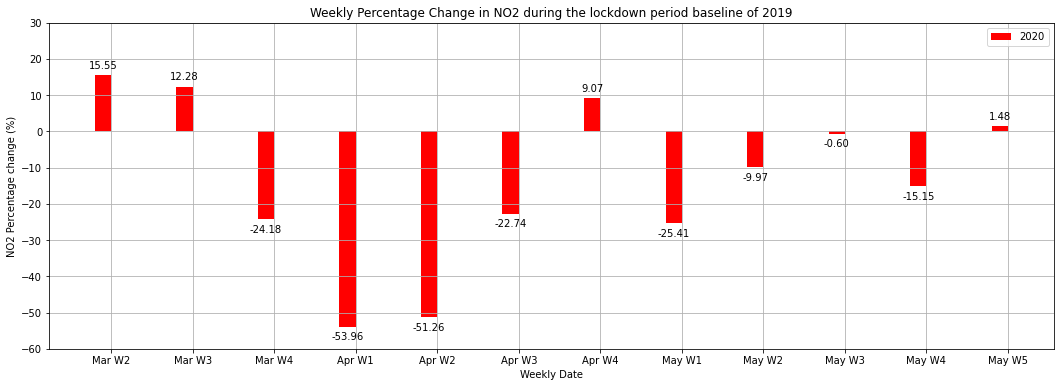

In [ ]:
# calculate percentage change between in 2019 and 2020 during the lockdown period
weekly_2019 = (weekly_AQ_df[weekly_AQ_df.index.year == 2019]['tropospheric_NO2_column_number_density'][:-1]) 
weekly_2020 = (weekly_AQ_df[weekly_AQ_df.index.year == 2020]['tropospheric_NO2_column_number_density'])

weekly_value = ((weekly_2020.values - weekly_2019.values)/weekly_2019.values) * 100
locked_down_period = pd.DataFrame(weekly_value, index = weekly_AQ_df[weekly_AQ_df.index.year == 2019][:-1].index, columns=['No2'])
locked_down_pct_change = locked_down_period[(locked_down_period.index.month>= 3) & (locked_down_period.index.month<=5) ][:-1]



fig, ax = plt.subplots(figsize=(18, 6))
labels = [ 'Mar W2', 'Mar W3', 'Mar W4','Apr W1', 'Apr W2', 'Apr W3', 'Apr W4','May W1', 'May W2', 'May W3', 'May W4', 'May W5',]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rect_change = ax.bar(x - width/2, locked_down_pct_change.No2, width, color='red', label='2020')

ax.set_xticks(x, labels)
ax.set_title('Weekly Percentage Change in NO2 during the lockdown period baseline of 2019')
ax.grid()
ax.set_xlabel('Weekly Date')
ax.set_ylabel('NO2 Percentage change (%)')
ax.bar_label(rect_change, padding=5, fmt = '%.2f')

ax.set_ylim([-60, 30])
ax.legend()
plt.show()


# Plot Relationship between Nitogen Oxide and Mobility Data for the year 2020 and 2021

In [ ]:
# Merge Daily mobility data and agrregate to weekly to conform with nitrogen oxide data
def preprocess_df_with_mobility_data(df):
    # aggregate the raster value to average daily coverage
    if 'Timestamp' in df.columns:
      df['pandas_time'] = pd.to_datetime(df['Timestamp'])
      return df.groupby(pd.Grouper(key='pandas_time', freq='1D')).mean()
    else:
      return df

# merge the data_frame containing all the data together
default_column = ['millis','Timestamp',
                  'Year', 'Month', 'DOY', 'pandas_time']

# merge AQ data with mobility data
AQ_df_with_mobility = reduce(lambda a,b: pd.merge(a,b[b.columns.difference(default_column)], 
                                    left_index=True, 
                                    right_index=True, 
                                    how='left'), 
                             [preprocess_df(df) for df in AQ_dfs + [lagos_mobility_df]])

# Aggregate the data weekly
weekly_AQ_df_with_mobility = AQ_df_with_mobility.groupby(pd.Grouper(freq='7D')).mean().dropna(subset=['grocery_and_pharmacy_percent_change_from_baseline'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  del sys.path[0]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


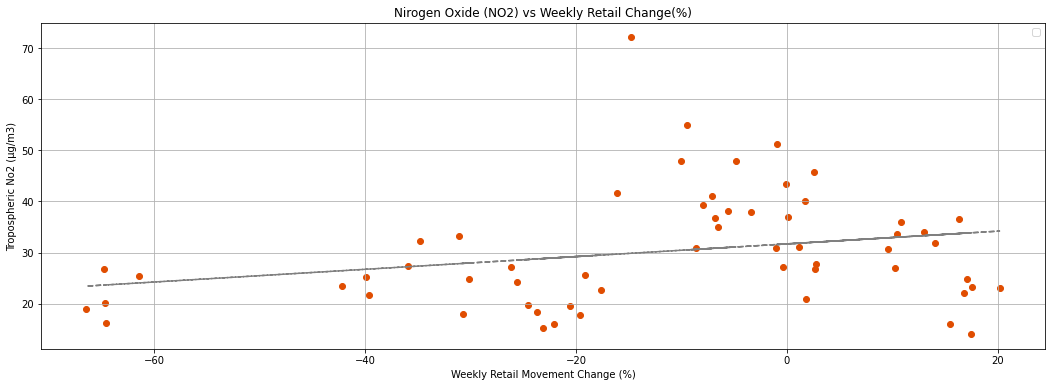

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  del sys.path[0]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


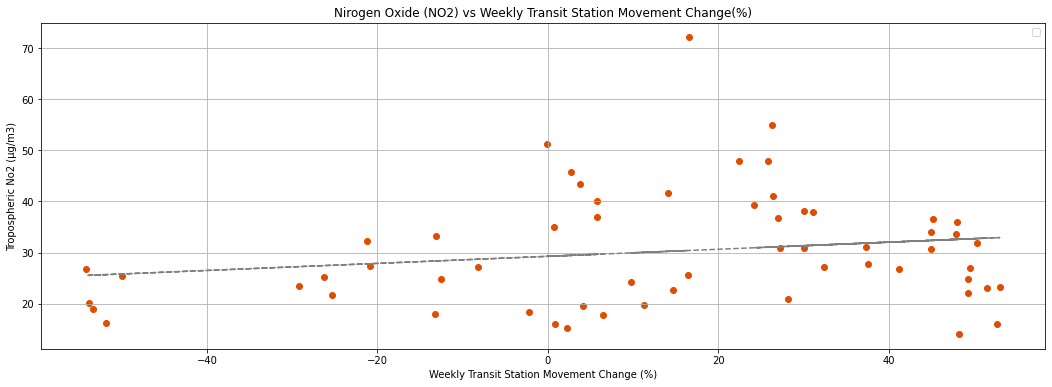

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  del sys.path[0]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


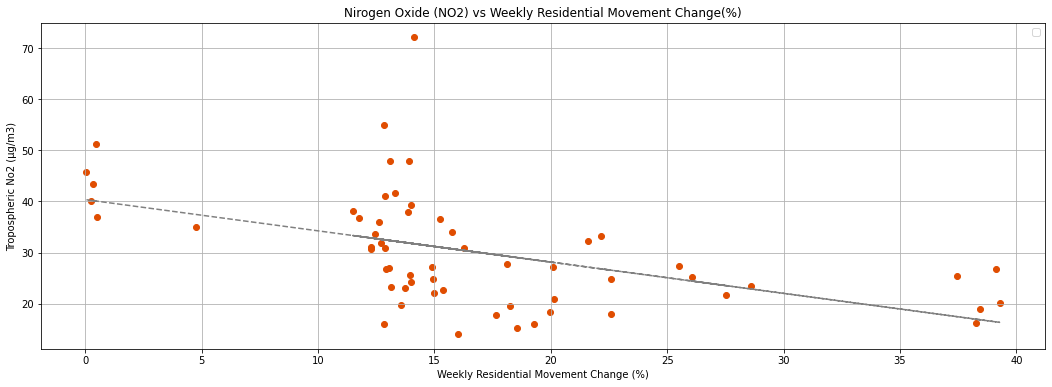

In [ ]:
# Plot a scatter plot between the  4 different mobility data and the Nitrogen Oxide value
def plot_scatter(df, col_type, x_label, title):
  
  fig, ax = plt.subplots(figsize=(18, 6))
  y_value = df['tropospheric_NO2_column_number_density'] * (10**6)
  x_value = df[col_type]
  ax.scatter(x_value, y_value, c='#E04D01')

  # add trend line

  z = np.polyfit(x_value, y_value, 1)
  p = np.poly1d(z)
  ax.plot(x_value,p(x_value),"r--", c='grey')


  ax.set_title(title)
  ax.grid()
  ax.set_xlabel(x_label)
  ax.set_ylabel('Tropospheric No2 (µg/m3)')

  ax.legend()
  plt.show()

plot_scatter(weekly_AQ_df_with_mobility, 
              col_type ='retail_and_recreation_percent_change_from_baseline',
              x_label='Weekly Retail Movement Change (%)',
              title = 'Nirogen Oxide (NO2) vs Weekly Retail Change(%)')

plot_scatter(weekly_AQ_df_with_mobility, 
              col_type ='transit_stations_percent_change_from_baseline',
              x_label='Weekly Transit Station Movement Change (%)',
              title = 'Nirogen Oxide (NO2) vs Weekly Transit Station Movement Change(%)')

plot_scatter(weekly_AQ_df_with_mobility, 
              col_type ='residential_percent_change_from_baseline',
              x_label='Weekly Residential Movement Change (%)',
              title = 'Nirogen Oxide (NO2) vs Weekly Residential Movement Change(%)')

# Do a Confusion Matrix

In [ ]:
mobility_col =['tropospheric_NO2_column_number_density',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline']

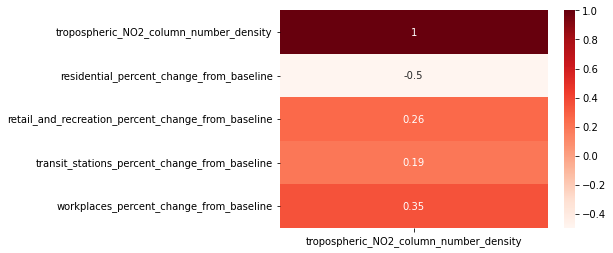

In [ ]:
# Getting a closer look at the in Corrletion matrix graph
# weekly_AQ_df_with_mobility
import seaborn as sns
corrMatrix = weekly_AQ_df_with_mobility[mobility_col].corr()[['tropospheric_NO2_column_number_density']]
sns.heatmap(corrMatrix, annot=True, cmap='Reds' )
plt.show()

# Night Light Percentage Change

In [ ]:
night_value_before_covid = monthly_night_line_df[(monthly_night_line_df['Timestamp'] >= pd.to_datetime('2020-01-01')) & (monthly_night_line_df['Timestamp'] <= pd.to_datetime('2020-03-01')) ]['avg_rad'].mean()
night_value_after_covid = monthly_night_line_df[(monthly_night_line_df['Timestamp'] >= pd.to_datetime('2020-04-01')) & (monthly_night_line_df['Timestamp'] <= pd.to_datetime('2020-06-01'))]['avg_rad'].mean()
pct_change_in_night = ((night_value_after_covid - night_value_before_covid)/night_value_before_covid)* 100

In [ ]:
pct_change_in_night

15.302487142671897